# Regresión Lineal

Así como la Clasificación de Bayes Ingena es un buen punto de partida para tareas de clasificación, la regresión lineal es buen inicio para tareas de regresión.
Estos modelos son populares porque son rápidos de ajustar y son interpretables.
Por las clases pasadas ya eres familiar con la forma más simple de un modelo de regresión lineal (es decir, ajustar una línea recta a los datos), pero dichos modelos pueden ser extendidos para representar comportamiento más complejo en los datos.

En esta sección comenzaremos con una vista rápida e intuitiva sobre la matemática detrás de este problema, antes de ver cómo los modelos lineales pueden ser generalizados para dar cuenta de patrones más complejos en los datos.

Comencemos con el preámbulo estándar:

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns; sns.set(font='Linux Biolinum O')

## Regresión Lineal Simple

Comenzamos con el tipo de regresión más conocido por nosotros: un ajuste directo de una línea recta a los datos.
Una línea recta tiene la siguiente forma:

$$
y = ax + b,
$$

donde $a$ es conocida como la _pendiente_ (_slope_), y $b$ es conocida como la _intercepta_ (_intercept_).

Considra los siguientes datos esparcidos a lo largo de una recta de pendiente 2 e intercepta de -5:

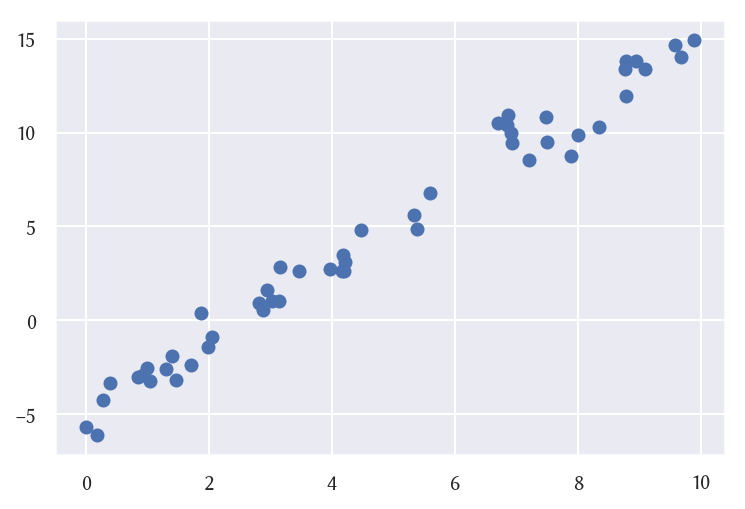

In [2]:
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = 2 * x - 5 + rng.randn(50)
plt.scatter(x, y);

Podemos usar el estimador ``LinearRegression`` de Scikit-Learn para ajustar estos datos al modelo y construir la línea recta de mejor ajuste:

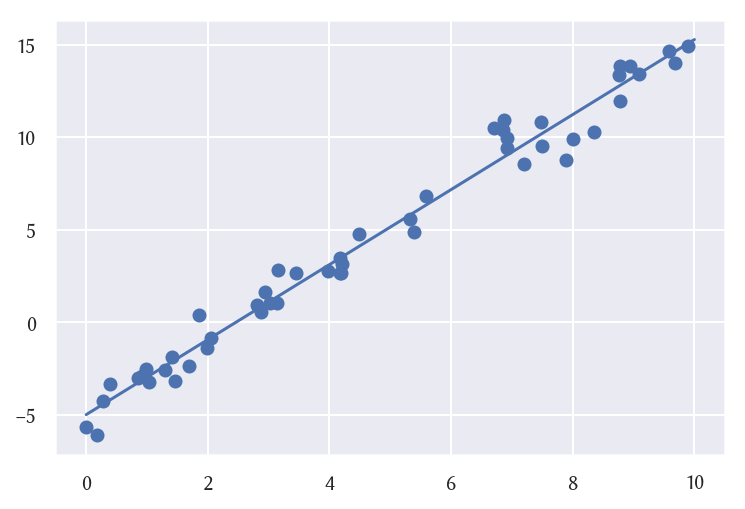

In [3]:
# Nuestra receta: importar el modelo
from sklearn.linear_model import LinearRegression

# Instanciarlo con Hiperparámetros
model = LinearRegression(fit_intercept=True)

# Ajustar a los datos
model.fit(x[:, np.newaxis], y)

# Predecir valores
xfit = np.linspace(0, 10, 1000)
yfit = model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit);

La pendiente e intercepta de los datos se almacenan en los parámetros ajustados del modelo, que en Scikit-Learn siempre se marcan con un sufijo de guión bajo.
Aquí los más relevantes son los coeficientes del modelo (``coef_``) y la intercepta (``intercept_``):

In [4]:
print("Pendiente del Modelo :", model.coef_[0])
print("Intercepta del Modelo:", model.intercept_)

Pendiente del Modelo : 2.0272088103606953
Intercepta del Modelo: -4.998577085553204


Vemos que los resultados son cercanos a los parámetros con los que creamos la recta, como esperábamos.

Sin embargo, el estimador ``LinearRegression`` tiene capacidades que van más allá de esto. Puede generar modelos multidimensionales lineales de la forma:

$$
y = a_0 + a_1 x_1 + a_2 x_2 + \cdots,
$$

donde hay múltiples valores de $x$.
En términos geométricos, esto es equivalente a ajustar un plano a los puntos en tres dimensiones, o ajustar un hiper-plano a puntos en dimensiones más grandes.

La naturaleza multidimensional de dichas regresiones las hace más difíciles de visualizar, pero podemos ver una de ellas en acción al construir datos de ejemplo, utilizando el operador de multiplicación de matrices de NumPy:

In [5]:
rng = np.random.RandomState(1)
X = 10 * rng.rand(100, 3)
y = 0.5 + np.dot(X, [1.5, -2., 1.])

model.fit(X, y)
print(model.intercept_)
print(model.coef_)

0.50000000000001
[ 1.5 -2.   1. ]


El arreglo objetivo $y$ se ha construido a partir de tres variables aleatorias, y la regresión linear ha recuperado los coeficientes usados para construir los datos.

De este modo, podemos utilizar el estimador ``LinearRegression`` para ajustar líneas, planos o hiper-planos a nuestros datos.
Pareciera que este enfoque se limita a relaciones lineales entre variables, pero en verdad también podemos relajar ese aspecto y ver relaciones no lineales.

## Función Base de Regresión (_Basis Regression Function_)

Un truco que puedes usar para adaptar la regresión lineal a relaciones no lineales entre variables es transformar los datos usando _funciones base_ (_basis functions_).
Ya vimos algo de esto antes, en la _pipeline_ de ``PolynomialRegression`` utilizada en la clase de Hiperparámetros y Validación de Modelos, e Ingeniería de Características.
La idea es tomar nuestro modelo multidimensional lineal:

$$
y = a_0 + a_1 x_1 + a_2 x_2 + a_3 x_3 + \cdots,
$$

y costruir las variables $x_1, x_2, x_3,$ _etc._, desde una entrada unidimensional $x$.
Es decir, definimos $x_n = f_n(x)$, donde $f_n()$ es alguna función que transforma nuestros datos.

Por ejemplo, si $f_n(x) = x^n$, nuestro modelo se convierte en una regresión polinomial:

$$
y = a_0 + a_1 x + a_2 x^2 + a_3 x^3 + \cdots.
$$

Nota que este modelo _sigue siendo lineal_. La linealidad se refiere a que los coeficientes $a_n$ nunca se multiplican o dividen entre sí.
En realidad, lo que hemos hecho es tomar nuestro $x$ unidimensional y proyectarlo a una dimensión más alta, de tal modo que se pueda ajustar una relación más compleja entre $x$ e $y$.

### Funciones Base Polinomiales

La proyección polinomial es lo suficientemente útil como para estar incorporada en Scikit-Learn, a través del transformador ``PolynomialFeatures``:

In [6]:
from sklearn.preprocessing import PolynomialFeatures
x = np.array([2, 3, 4])
poly = PolynomialFeatures(3, include_bias=False)
poly.fit_transform(x[:, np.newaxis])

array([[ 2.,  4.,  8.],
       [ 3.,  9., 27.],
       [ 4., 16., 64.]])

Vemos que el transformador ha convertido nuestros datos unidimensionales (`x`) en una matrix tridimensional al calcular los exponentes de cada valor.
Este nuevo dataset con más dimensiones puede usarse para ajustar una regresión lineal.

Como vimos en Ingeniería de Características, la manera más limpia de realizar esto es usando una _pipeline_.
Hagamos un modelo polinomial de 7mo. grado así:

In [7]:
from sklearn.pipeline import make_pipeline
poly_model = make_pipeline(PolynomialFeatures(7),
                           LinearRegression())

Podemos usar este modelo para ajustar relaciones más complicadas que una lineal entre $x$ e $y$.
Por ejemplo, una onda seno con ruido:

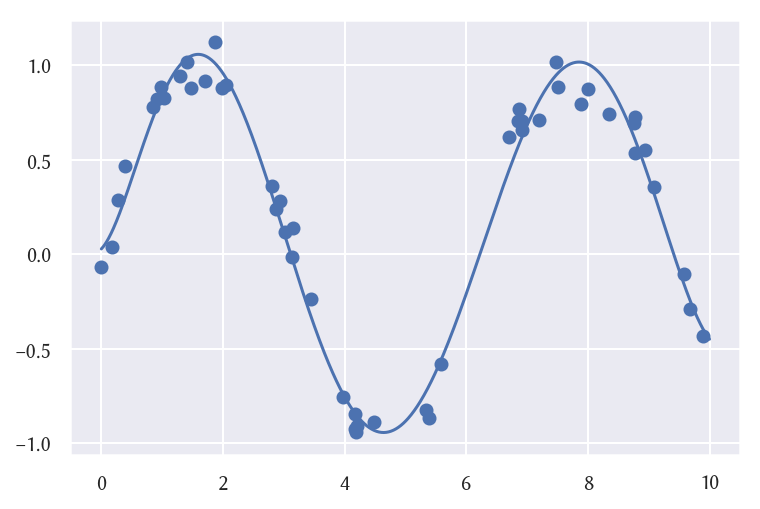

In [8]:
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = np.sin(x) + 0.1 * rng.randn(50)

poly_model.fit(x[:, np.newaxis], y)
yfit = poly_model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit);

¡Al usar una función base polinomial de 7mo. grado, nuestro modelo lineal hizo un ajuste excelente para datos que no eran lineales!

### Funciones Base Gaussianas (_Gaussian Basis Functions_)

Otras funciones base existen.
Por ejemplo, un patrón útil es ajustar un modelo que no es una suma de bases polinomiales, sino la suma de bases Gaussianas.
Esto podría verse como en la siguiente imagen:

![](figures/05.06-gaussian-basis.png)

Las regiones sombreadas son funciones base escaladas, que cuando son aplicadas juntas reproducen la curva suave que va a través de los datos.
Estas funciones base Gaussianas no están incorporadas en Scikit-Learn, pero podemos escribir un transformador _personalizado_ (_custom_) que se encargue de crearlas y aplicadas, como se ve e ilustra a continuación (nota que los transformadores son implementados como clases en Python; leer el código fuente de Scikit-Learn es una buena manera de aprender cómo se hacen):

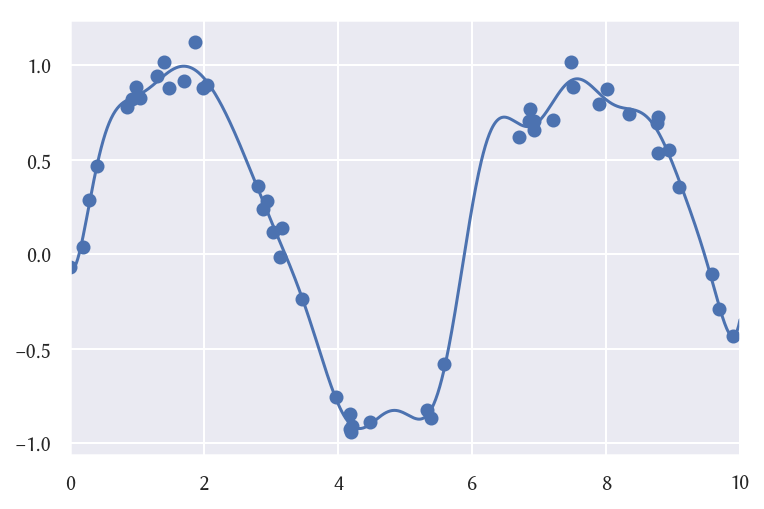

In [9]:
from sklearn.base import BaseEstimator, TransformerMixin

class GaussianFeatures(BaseEstimator, TransformerMixin):
    """Características Gaussianas distribuidas uniformemente en el espacio para datos unidimensionales"""
    
    def __init__(self, N, width_factor=2.0):
        self.N = N
        self.width_factor = width_factor
    
    @staticmethod
    def _gauss_basis(x, y, width, axis=None):
        arg = (x - y) / width
        return np.exp(-0.5 * np.sum(arg ** 2, axis))
        
    def fit(self, X, y=None):
        # crear N centros para las distribuciones, disperos a lo largo del rango de los datos
        self.centers_ = np.linspace(X.min(), X.max(), self.N)
        self.width_ = self.width_factor * (self.centers_[1] - self.centers_[0])
        return self
        
    def transform(self, X):
        return self._gauss_basis(X[:, :, np.newaxis], 
                                 self.centers_,
                                 self.width_, axis=1)
    
gauss_model = make_pipeline(GaussianFeatures(20),
                            LinearRegression())

gauss_model.fit(x[:, np.newaxis], y)
yfit = gauss_model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit)
plt.xlim(0, 10);

Este ejemplo muestra que no hay nada mágico en las funciones base: si tienes alguna intuición respecto al proceso que generó tus datos que sea coherente con una u otra función base, entonces la puedes implementar y usar.

## Regularización (_Regularization_)

La introducción de funciones base en nuestra regresión lineal vuelve más flexible al modelo, pero también puede llevar rápidamente a sobreajustar los datos (mira la clase de Hiperparámetros y Validación de Modelos para una discusión sobre el tema).
Por ejemplo, si elegimos demasiadas funciones base Gaussianas, terminamos con resultados que no se ve tan bien:

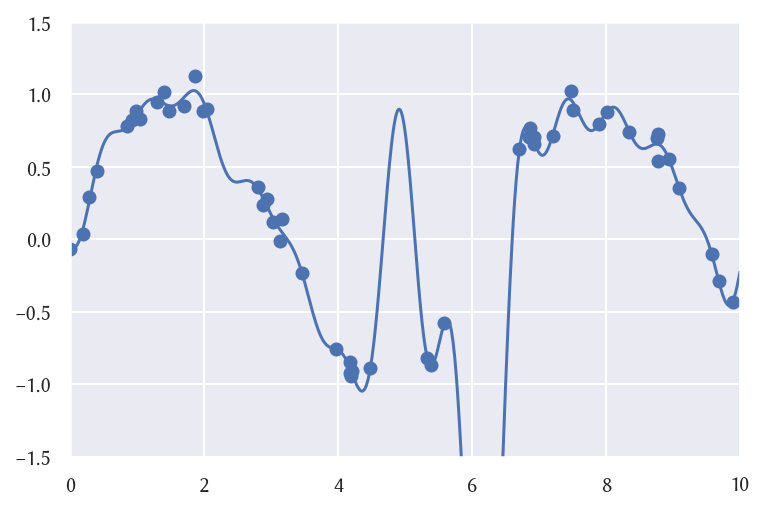

In [10]:
model = make_pipeline(GaussianFeatures(30),
                      LinearRegression())
model.fit(x[:, np.newaxis], y)

plt.scatter(x, y)
plt.plot(xfit, model.predict(xfit[:, np.newaxis]))

plt.xlim(0, 10)
plt.ylim(-1.5, 1.5);

Con los datos proyectados a una base de 30 dimensiones, el modelo tiene demasiada flexibilidad, lléndose a valores extremos entre los lugares donde había menos restricciones en base a los datos.
Podemos ver la razón de esto si graficamos los coeficientes de las bases Gaussianas con respecto a sus ubicaciones:

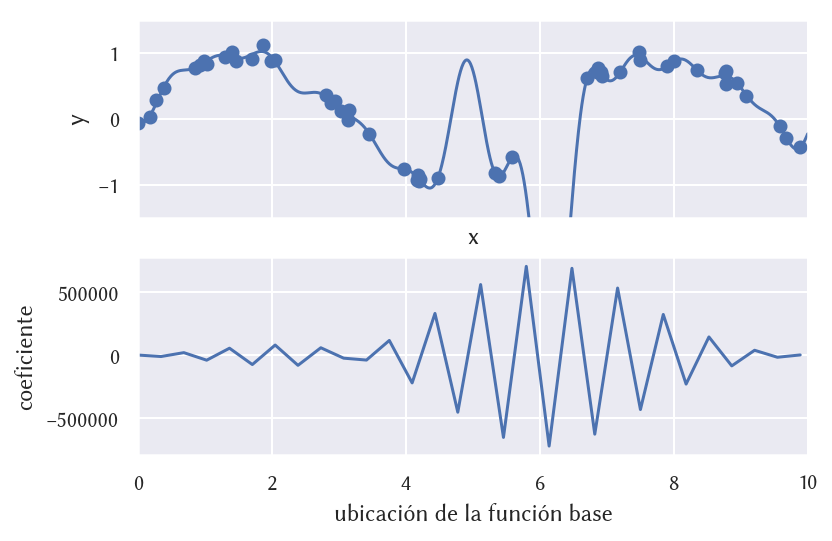

In [11]:
def basis_plot(model, title=None):
    fig, ax = plt.subplots(2, sharex=True)
    model.fit(x[:, np.newaxis], y)
    ax[0].scatter(x, y)
    ax[0].plot(xfit, model.predict(xfit[:, np.newaxis]))
    ax[0].set(xlabel='x', ylabel='y', ylim=(-1.5, 1.5))
    
    if title:
        ax[0].set_title(title)

    ax[1].plot(model.steps[0][1].centers_,
               model.steps[1][1].coef_)
    ax[1].set(xlabel='ubicación de la función base',
              ylabel='coeficiente',
              xlim=(0, 10))
    
model = make_pipeline(GaussianFeatures(30), LinearRegression())
basis_plot(model)

El panel inferior de la imagen muestra la amplitud de la función base en cada ubicación.
Este comportamiento oscilante es típico del sobreajuste cuando las funciones base se sobreponen: los coeficientes terminan explotando para poder cancelarse unos a otros.
Sabemos que dicho comportamiento es problemático, y sería bueno si pudiésemos limitar esas cimas explícitamente en el modelo a través de la penalización de valores grandes en los parámetros del modelo. 
Tal penalización es conocida como _regularización_, y está disponible en varias maneras.
The lower panel of this figure shows the amplitude of the basis function at each location.
This is typical over-fitting behavior when basis functions overlap: the coefficients of adjacent basis functions blow up and cancel each other out.
We know that such behavior is problematic, and it would be nice if we could limit such spikes expliticly in the model by penalizing large values of the model parameters.
Such a penalty is known as *regularization*, and comes in several forms.

### Regresión Crestal (_Ridge Regressión_, o Regularización $L_2$)

Quizás el método más común de regularización es conocido como _regresión crestal_ (_ridge regression_) o _regularización_ $L_2$, a veces llamado también _regularización de Tokhonov_.
Este método procede a penalizar la suma de los cuadrados (norma 2) de los coeficientes del modelo; en este caso, la penalización del modelo sería:

$$
P = \alpha\sum_{n=1}^N \theta_n^2,
$$

donde $\alpha$ es un hiperparámetro que controla la fuerza de la penalización.
Este tipo de modelo penalizado está disponible en Scikit-Learn a través del estimador ``Ridge``:

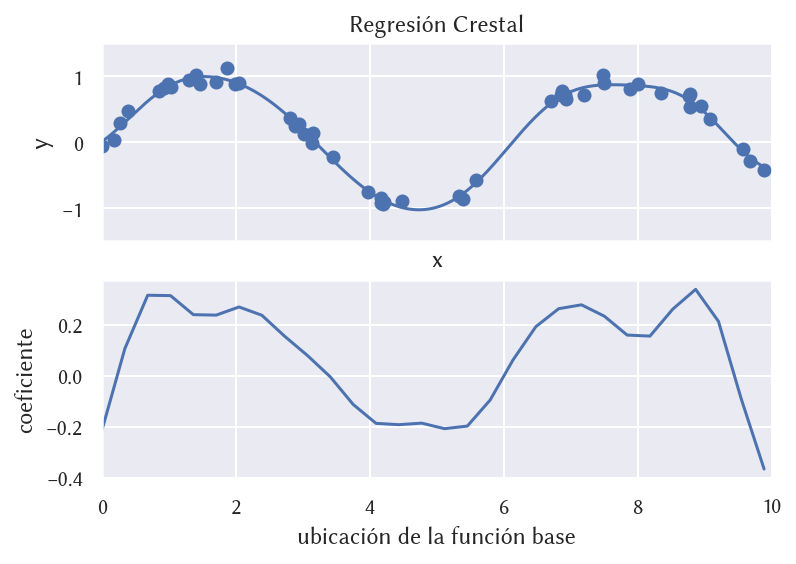

In [12]:
from sklearn.linear_model import Ridge
model = make_pipeline(GaussianFeatures(30), Ridge(alpha=0.1))
basis_plot(model, title='Regresión Crestal')

El parámetro $\alpha$ es esencialmente un nudo que controla la complejidad del modelo resultante.
En el límite $\alpha \to 0$, recuperamos el modelo estándar de regresión lineal; en el límite $\alpha \to \infty$, todas las respuestas del modelo serán suprimidas.
Una ventaja de la regresión crestal en particular es que puede ser computada eficientemente, con un costo marginal sobre el del modelo de regresión lineal original.

### Regresión de Lazo (_Lasso Regression_, Regularización $L_1$)

Otro tipo común de regularización es conocida como _lazo_ (_lasso_), y penaliza la suma de los valores absolutos (norma 1) de los coeficientes de la regresión:

$$
P = \alpha\sum_{n=1}^N |\theta_n|.
$$

Aunque conceptualmente es similar a la regresión crestal, los resultados pueden ser sorprendemente diferentes: por ejemplo, debido a motivos geométricos, la regresión lazo tiende a favorcer _modelos dispersos_ cuando es posible, es decir, tiende a definir modelos cuyos coeficientes son ceros.

Podemos ver esto al duplicar la imagen de la regresión crestal, pero utilizando los coeficientes normalizados:

/home/egraells/.virtualenvs/jupyter/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


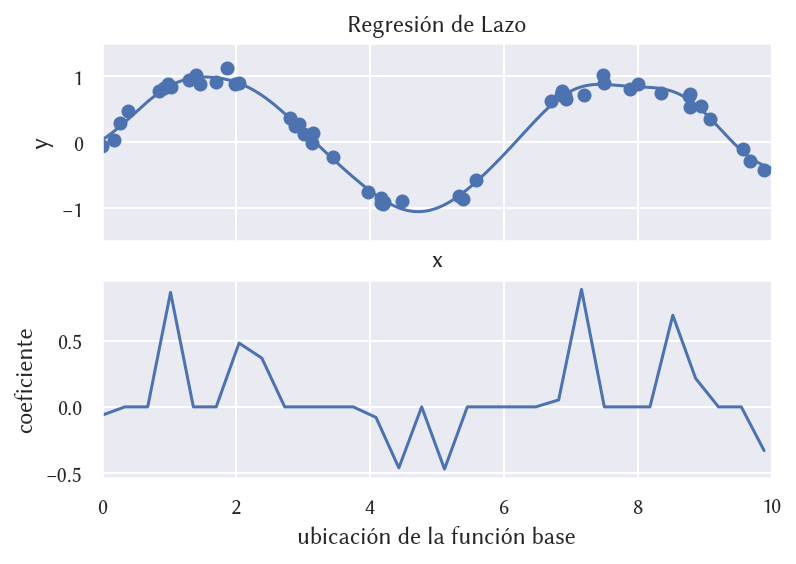

In [13]:
from sklearn.linear_model import Lasso
model = make_pipeline(GaussianFeatures(30), Lasso(alpha=0.001))
basis_plot(model, title='Regresión de Lazo')

Con la penalidad lazo, la mayoría de los coeficientes son exactamente cero- El comportamiento del modelo se rige por un pequeño subconjunto de las funciones base disponibles.
Como en la regularización crestal, el parámetro $\alpha$ equaliza la fuerza de la penalización, y debería ser determinada, por ejemplo, a través de validación cruzada (mira la clase de Hiperparámetros y Validación de Modelos para una discusión sobre el tema).

## Ejemplo: Prediciendo el Tráfico de Bicicletas

Como ejemplo práctico, veamos si somos capaces de predecir el número de viajes en bicicleta que cruzan el Puente Fremont en Seattle, considerando clima, estación del año y otros factores.

Cruzaremos un dataset de bicicletas con otro, y trataremos de determinar el poder predicitivo del clima y factores estacionales como la temperatura, la lluvia y las horas de luz afectan el volumen del tráfico de bicicletas a través del puente.
Afortunadamente, por un lado la Agencia del Clima de Estados Unidos (NOAA) disponibiliza [datos climáticos diarios](http://www.ncdc.noaa.gov/cdo-web/search?datasetid=GHCND) (usaremos la estación de medición _ID USW00024233_), y por otro Pandas nos hace fácil cruzar dos datasets.
Ejecutaremos una regresión lineal simple para relacionar estos factores al conteo de bicicletas, para así estimar cómo el cambio en cada uno de esos parámetros afecta el número de ciclistas en un día dado.

En particular, este ejemplo muestra como las herramientas de Scikit-Learn se pueden usar en un framework de modelamiento estadístico, en el cual se asume que los parámetros aprendidos del modelo tienen un significado interpretable.
Como discutimos previamente, éste no es el enfoque estándar en machine learning, pero interpretar los resultados es posible para algunos modelos.

Comencemos cargando los dos datasets, usando la fecha como índice en cada uno:

In [14]:
#!curl -o FremontBridge.csv https://data.seattle.gov/api/views/65db-xm6k/rows.csv?accessType=DOWNLOAD

In [15]:
import pandas as pd
counts = pd.read_csv('FremontBridge.csv', index_col='Date', parse_dates=True)
counts.head()

,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,
2012-10-03 00:00:00,9.0,4.0
2012-10-03 01:00:00,6.0,4.0
2012-10-03 02:00:00,1.0,1.0
2012-10-03 03:00:00,3.0,2.0
2012-10-03 04:00:00,1.0,6.0


In [16]:
weather = pd.read_csv('data/BicycleWeather.csv', index_col='DATE', parse_dates=True)
weather.head()

,STATION,STATION_NAME,PRCP,SNWD,SNOW,TMAX,TMIN,AWND,WDF2,WDF5,...,WT17,WT05,WT02,WT22,WT04,WT13,WT16,WT08,WT18,WT03
DATE,,,,,,,,,,,,,,,,,,,,,
2012-01-01,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,0,0,0,128,50,47,100,90,...,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999
2012-01-02,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,109,0,0,106,28,45,180,200,...,-9999,-9999,-9999,-9999,-9999,1,1,-9999,-9999,-9999
2012-01-03,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,8,0,0,117,72,23,180,170,...,-9999,-9999,-9999,-9999,-9999,-9999,1,-9999,-9999,-9999
2012-01-04,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,203,0,0,122,56,47,180,190,...,-9999,-9999,-9999,-9999,-9999,1,1,-9999,-9999,-9999
2012-01-05,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,13,0,0,89,28,61,200,220,...,-9999,-9999,-9999,-9999,-9999,-9999,1,-9999,-9999,-9999


Ahora computaremos el tráfico de bicicletas total por día, y lo pondremos en su propio DataFrame:

In [17]:
daily = counts.resample('d').sum()
daily['Total'] = daily.sum(axis=1)
daily = daily[['Total']] # nos quedamos solamente con esta columna

Los patrones de uso suelen depender del día de la semana debido a las rutinas de las personas; tengamos esto en cuenta al agregar columnas binarias que indiquen el día de la semana de cada observación:

In [18]:
days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
for i in range(7):
    daily[days[i]] = (daily.index.dayofweek == i).astype(float)

Similarmente, podríamos esperar que les ciclistes se comporten de manera distinta en días feriados; agreguemos un indicador de esto también:

In [19]:
# ¡para feriados en Estados Unidos hay herramientas disponibles en pandas!
from pandas.tseries.holiday import USFederalHolidayCalendar
cal = USFederalHolidayCalendar()
holidays = cal.holidays('2012', '2016')
daily = daily.join(pd.Series(1, index=holidays, name='holiday'))
daily['holiday'].fillna(0, inplace=True)

Quizás podríamos sospechar que la cantidad de horas de luz en un día afecta los patrones de uso de bicicleta; para poder incorporar esto usaremos una fórmula astronómica estándar:

(8, 17)

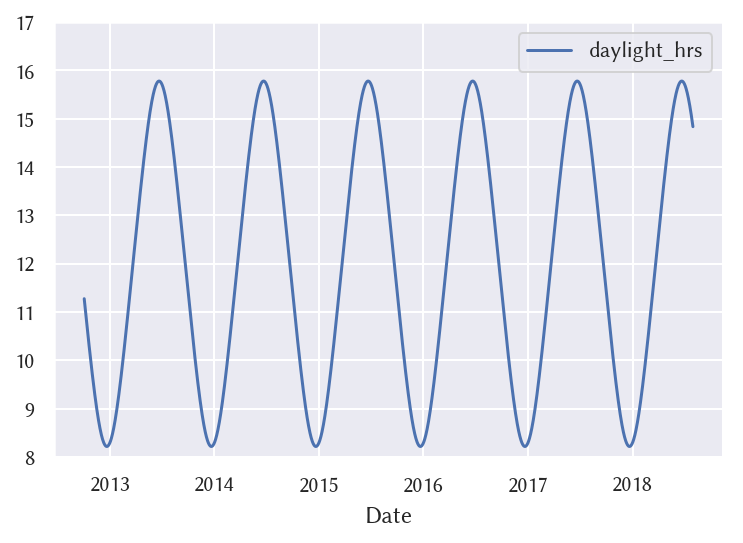

In [20]:
def hours_of_daylight(date, axis=23.44, latitude=47.61):
    """Computa las horas de luz para una fecha y coordenadas específicas"""
    days = (date - pd.datetime(2000, 12, 21)).days
    m = (1. - np.tan(np.radians(latitude))
         * np.tan(np.radians(axis) * np.cos(days * 2 * np.pi / 365.25)))
    return 24. * np.degrees(np.arccos(1 - np.clip(m, 0, 2))) / 180.

daily['daylight_hrs'] = list(map(hours_of_daylight, daily.index))
daily[['daylight_hrs']].plot()
plt.ylim(8, 17)

También podemos agregar la temperatura promedio y la precipitación total de un día a los datos.
Además de agregar la cantidad de precipitación, agreguemos una etiqueta que indique si llovió en el día o no, es decir, si fue un día seco:

In [21]:
# las temperaturas del dataset están en décimas de grados Celsius
weather['TMIN'] /= 10
weather['TMAX'] /= 10
weather['Temp (C)'] = 0.5 * (weather['TMIN'] + weather['TMAX'])

# la precipitación está en décimas de milímetros, pero como el ejemplo es de los EEUU lo convierten a pulgadas
weather['PRCP'] /= 254
weather['dry day'] = (weather['PRCP'] == 0).astype(int)

daily = daily.join(weather[['PRCP', 'Temp (C)', 'dry day']])

Finalmente, agreguemos un contados que se incrementa desde el día 1, y que mide cuántos años han pasado, asumiendo que la edad del sistema tiene influencia en la cantidad de gente que lo usa:

In [22]:
daily['annual'] = (daily.index - daily.index[0]).days / 365.

Ahora que nuestros datos están en orden, los podemos mirar:

In [23]:
daily.sample(5)

,Total,Mon,Tue,Wed,Thu,Fri,Sat,Sun,holiday,daylight_hrs,PRCP,Temp (C),dry day,annual
Date,,,,,,,,,,,,,,
2015-09-19,1834.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,12.143547,NaN,NaN,NaN,2.961644
2015-09-02,3612.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,13.134601,NaN,NaN,NaN,2.915068
2013-10-03,3251.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,11.291930,0.031496,11.65,0.0,1.000000
2017-10-16,3921.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.546289,NaN,NaN,NaN,5.038356
2016-01-23,418.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,8.880383,NaN,NaN,NaN,3.306849


Con todo organizado, podemos elegir qué columnas utilizar para ajustar el modelo de regresión lineal a nuestros datos.
Como hiperparámetro usaremos ``fit_intercept = False``, porque las etiquetas de día de semana esencialmente operan como interceptas:

In [24]:
# Eliminamos filas que tienen valores nulos
daily.dropna(axis=0, how='any', inplace=True)

# Elegimos las columnas que utilizaremos
column_names = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun', 'holiday',
                'daylight_hrs', 'PRCP', 'dry day', 'Temp (C)', 'annual']

# Construimos nuestra matriz de características y arreglo objetivo
X = daily[column_names]
y = daily['Total']

# Instanciamos, Ajustamos y Predecimos
model = LinearRegression(fit_intercept=False)
model.fit(X, y)
daily['predicción'] = model.predict(X)

Finialmente, podemos comparar el total observado y la predicción del modelo de manera visual:

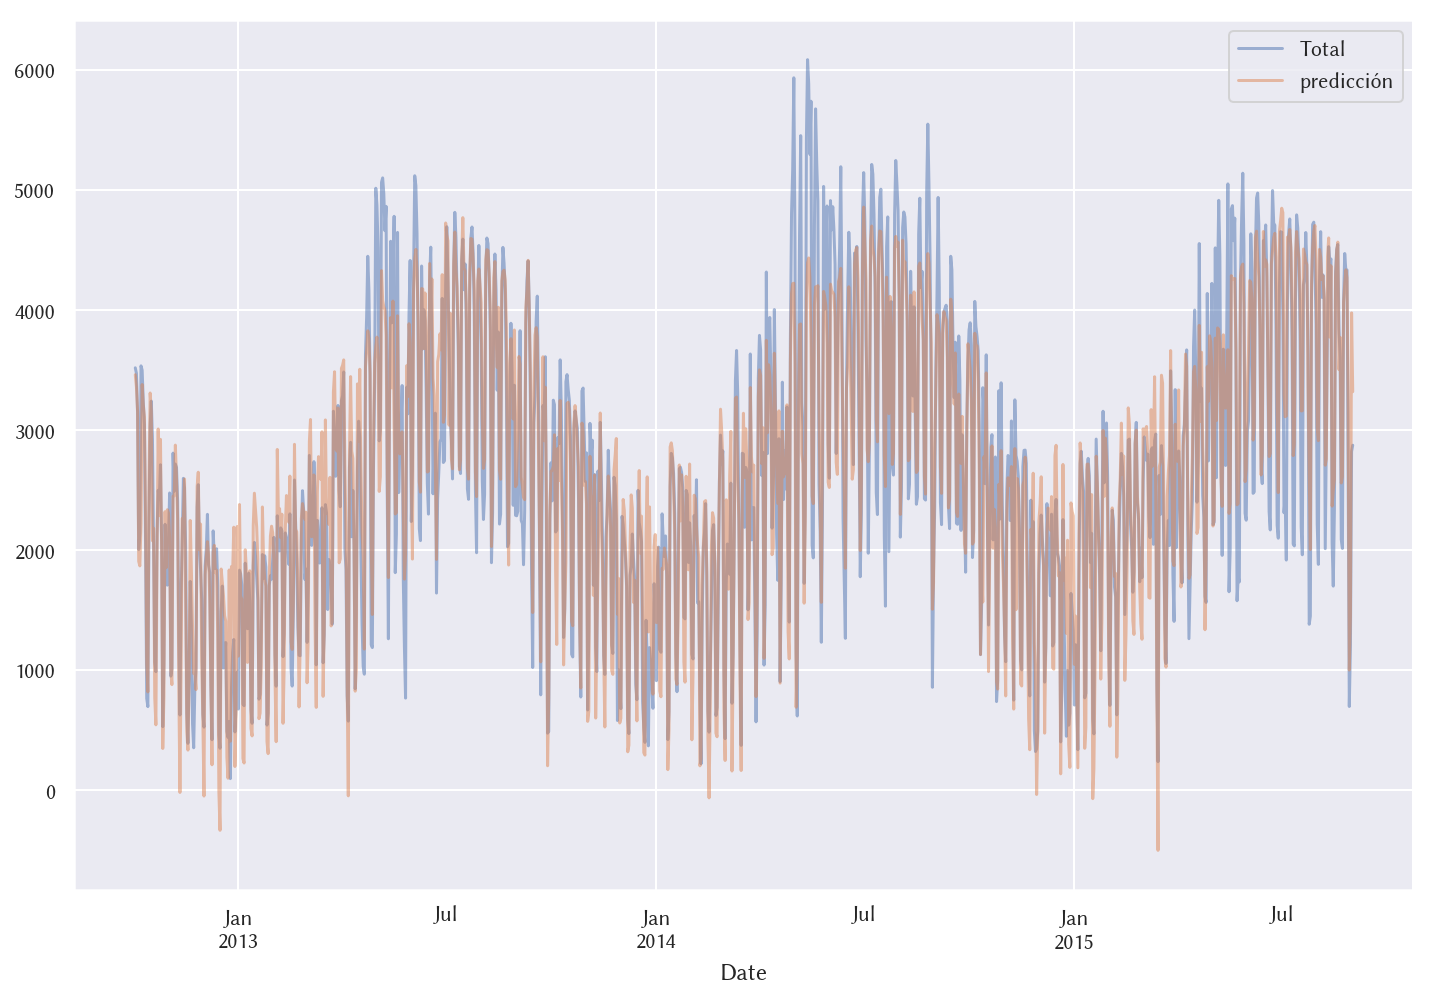

In [25]:
daily[['Total', 'predicción']].plot(alpha=0.5, figsize=(12, 8));

Es evidente que, a pesar de que el modelo aparenta funcionar bien, suele fallar en ocasiones identificables y repetibles, como el verano del hemisferio norte.
Esto puede ser porque nuestro set de características no está completo (es decir, la gente decide usar la bicicleta de acuerdo a más factores de los que consideramos), o que hay relaciones no lineales en los datos que no hemos logrado tener en cuenta (por ejemplo, quizás la gente usa menos la bicicleta tanto en temperaturas altas como bajas).
A pesar de todo, nuestra aproximación gruesa nos da _insights_, y podemos mirar los coeficientes del modelo lineal para estimar cómo cada factor contribuye al conteo diario de viajes en bicicleta:

In [26]:
params = pd.Series(model.coef_, index=X.columns)
params

Mon              504.882756
Tue              610.233936
Wed              592.673642
Thu              482.358115
Fri              177.980345
Sat            -1103.301710
Sun            -1133.567246
holiday        -1187.401381
daylight_hrs     128.851511
PRCP            -664.834882
dry day          547.698592
Temp (C)          65.162791
annual            26.942713
dtype: float64

Estos números son difíciles de interpretar sin alguna medida de su incertidumbre.
Podemos calcular dichas incertidumbres de manera rápida usando remuestreo _bootstrap_ de los datos:

In [27]:
from sklearn.utils import resample
np.random.seed(1)
err = np.std([model.fit(*resample(X, y)).coef_
              for i in range(1000)], 0)

Habiendo estimado estos errores, podemos ver de nuevo los resultados:

In [28]:
print(pd.DataFrame({'efecto': params.round(0),
                    'error': err.round(0)}))

              efecto  error
Mon            505.0   86.0
Tue            610.0   83.0
Wed            593.0   83.0
Thu            482.0   85.0
Fri            178.0   81.0
Sat          -1103.0   80.0
Sun          -1134.0   83.0
holiday      -1187.0  163.0
daylight_hrs   129.0    9.0
PRCP          -665.0   62.0
dry day        548.0   33.0
Temp (C)        65.0    4.0
annual          27.0   18.0


Lo primero que vemos es que hay una tendencia relativamente estable en las interceptas de día de semana: hay más ciclistas en los días de semana que en los fines de semana.
Vemos que por cada hora adicional de luz, 129 ± 9 personas eligen la bicicleta; 
un incremento en la temperatura de un grado Celsius estimula a 65 ± 4 personas a tomar sus bicicletas; 
un día seco significa que en promedio hay 548 ± 33 ciclistas que cruzaron el puente;
y cada pulgada extra de lluvia significa que 665 ± 62 personas dejan su _cleta_ en casa.
Una vez que todos estos efectos son considerados, vemos un incremento modesto de 27 ± 18 ciclistas cada año.

Sin duda a nuestro modelo le falta información. Por ejemplo, efectos no lineales (como la precipitación _y_ la baja temperatura) y tendencias no lineales (como la desinclinación a usar la bicicleta en temperaturas muy altas o muy bajas) no pueden ser incorporadas en este modelo.
Adicionalmente, hemos descartado información más granular (como la diferencia entre una mañana lluviosa y una tarde lluviosa), y hemos ignorado la correlación entre días (como el efecto de la lluvia en el día siguiente, o el efecto de un día inesperadamente soleado después de una racha de días lluviosos). Todos esos efectos son interesantes, y ahora tienes las herramientas para explorarlos si lo deseas :)

## Créditos

![](figures/PDSH-cover.png)

Este notebook contiene un extracto del libro [Python Data Science Handbook](http://shop.oreilly.com/product/0636920034919.do) por Jake VanderPlas; el contenido también está disponible en [GitHub](https://github.com/jakevdp/PythonDataScienceHandbook).

El texto se distribuye bajo una licencia [CC-BY-NC-ND](https://creativecommons.org/licenses/by-nc-nd/3.0/us/legalcode), y el código se distribuye bajo la licencia [MIT](https://opensource.org/licenses/MIT). Si te parece que este contenido es útil, por favor considera apoyar el trabajo [comprando el libro](http://shop.oreilly.com/product/0636920034919.do).

Traducción al castellano por [Eduardo Graells-Garrido](http://datagramas.cl), liberada bajo las mismas condiciones.